# Improving the Network Architecture of Vanilla Network

## **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras #Update Keras
import keras #Import the Keras

Using TensorFlow backend.


In [0]:
import numpy as np #Import numpy and provide alias as np

from keras.models import Sequential #Import sequential from keras models to create sequential model
from keras.layers import Dense, Dropout, Activation, Flatten, Add #import dense, activation, flatten and add from keras layer
from keras.layers import Convolution2D, MaxPooling2D #import Convolution2D and Maxpooling2D from keras layers
from keras.utils import np_utils #Import np_utils from keras to convert array to binary one hot vector

from keras.datasets import mnist #Import mnist data

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


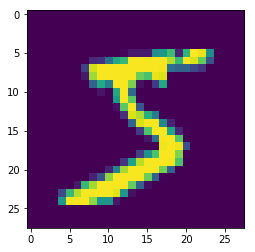

In [4]:
print (X_train.shape) #Print shape of the train dataframe
from matplotlib import pyplot as plt #Import pyplot as plt from matplotlib
%matplotlib inline 
plt.imshow(X_train[0]) #Show/Print the image

## Train Test reshaping data

In [0]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) #Shape of train dataframe with 1st Dimension(Depth) and 28*28 Matrix with 1 feature
X_test = X_test.reshape(X_test.shape[0],28,28,1)#Shape of test dataframe with 1st Dimension(Depth) and 28*28 Matrix with 1 feature

##Data Normalization

In [0]:
X_train = X_train.astype('float32') #Change the data type to float
X_test = X_test.astype('float32') #Change the data type to float
X_train /= 255  # Normalise the data values to a range of [0,1]
X_test /= 255 # Normalise the data values to a range of [0,1]

In [7]:
y_train[:10] #First 10 elements of one dimensional y_train array

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10] #First 10 elements of 10 dimensional class array of Y_train


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Vanilla Model Architecture

In [34]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # Applying 3X3 filter #26
model.add(Convolution2D(32,3,3,activation='relu')) #Applying 3X3 filter #24
model.add(Convolution2D(32,3,3,activation='relu')) #Applying 3X3 filter #22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11

model.add(Convolution2D(16,3,3,activation='relu')) #Applying 3X3 filter #9
model.add(Convolution2D(16,3,3,activation='relu')) #Applying 3X3 filter #7


model.add(Convolution2D(10, 5, activation='relu'))# Applying 5X5 filter#3

model.add(Convolution2D(10, 3))#1
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':


###Model Summary

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 9, 9, 16)          4624      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 7, 7, 16)          2320      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 3, 3, 10)          4010      
__________

###Compile the model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy']) 

###Training the Model

In [49]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.0073 - acc: 0.9980
Epoch 2/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0064 - acc: 0.9981
Epoch 3/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0092 - acc: 0.9976
Epoch 4/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0063 - acc: 0.9982
Epoch 5/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0079 - acc: 0.9982
Epoch 6/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0074 - acc: 0.9980
Epoch 7/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0062 - acc: 0.9980
Epoch 8/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0055 - acc: 0.9983
Epoch 9/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.0072 - acc: 0.9980
Epoch 10/10
60000/60000 [==============================] - 12s 197us/step - loss: 

###Score the Model

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

###Print Score Accuracy

In [51]:
print(score)

[0.05172640794752592, 0.9919]


###Conclusion:

###The Improvement on Vanilla Model has been performed by using the 
###MaxPooling, 
###1X1 Convolution 
###reducing the number of Parameters to 30680 from 60K. 

###Learnt that the decreasing the number of parameters would improve an accuracy further.

###98.13% to 99.19%